# Delete a run.

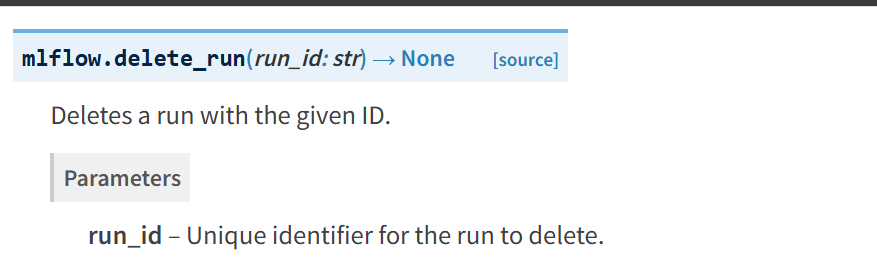

In [ ]:
import mlflow
from mlflow_for_ml_dev.src.utils.folder_operations import get_project_root

# set mlflow tracking uri
mlflow.set_tracking_uri(uri=(get_project_root() / 'mlruns').as_uri())

In [ ]:
# starting new run
with mlflow.start_run() as run:
    mlflow.log_param("a", 1)

run_id = run.info.run_id
mlflow.delete_run(run_id)

# check if the run is deleted
lifecycle_stage = mlflow.get_run(run_id).info.lifecycle_stage
print(f"run_id: {run_id}; lifecycle_stage: {lifecycle_stage}")    

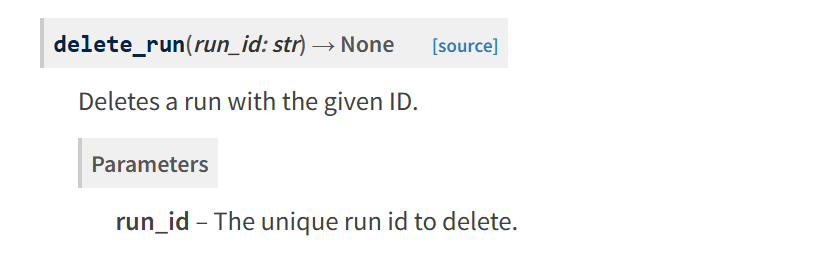

In [ ]:
client = mlflow.MlflowClient()

# starting new run
with mlflow.start_run() as run:
    mlflow.log_param("a", 1)
    print("Before deleting run")
    print(f"run_id: {run.info.run_id}; lifecycle_stage: {run.info.lifecycle_stage}")

run_id = run.info.run_id
client.delete_run(run_id)
print("After deleting run")
# check if the run is deleted
lifecycle_stage = client.get_run(run_id).info.lifecycle_stage
print(f"run_id: {run_id}; lifecycle_stage: {lifecycle_stage}")

# Restore a run

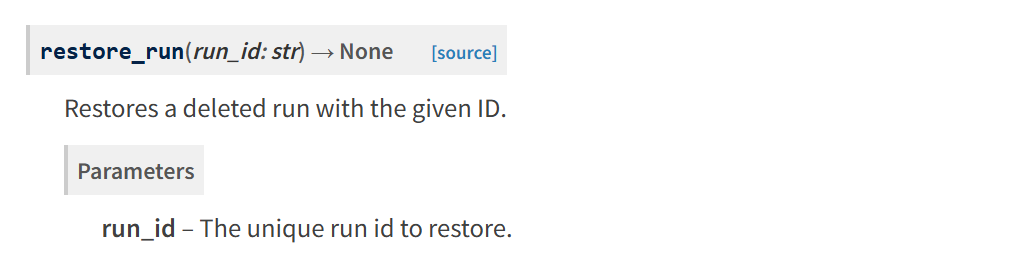

In [ ]:
client = mlflow.MlflowClient()

# starting new run
run = client.create_run(experiment_id="0")
run_id = run.info.run_id
print(f"run_id: {run_id}; lifecycle_stage: {run.info.lifecycle_stage}")

# delete the run
client.delete_run(run_id)
# check if the run is deleted
del_run = client.get_run(run_id)
print(f"run_id: {run_id}; lifecycle_stage: {del_run.info.lifecycle_stage}")

# restore the run
client.restore_run(run_id)
# check if the run is restored
rest_run = client.get_run(run_id)
print(f"run_id: {run_id}; lifecycle_stage: {rest_run.info.lifecycle_stage}")
